In [2]:
library(reshape2)
library(ggplot2)
library(dplyr)
library(plotly)
library(ggrepel)
library(shiny)

In [3]:
term.counts <- read.csv("term_freqs.csv", header = TRUE)

In [16]:
denserank <- function(x) {
    return(rank(unique(x))[match(x, unique(x))])
}

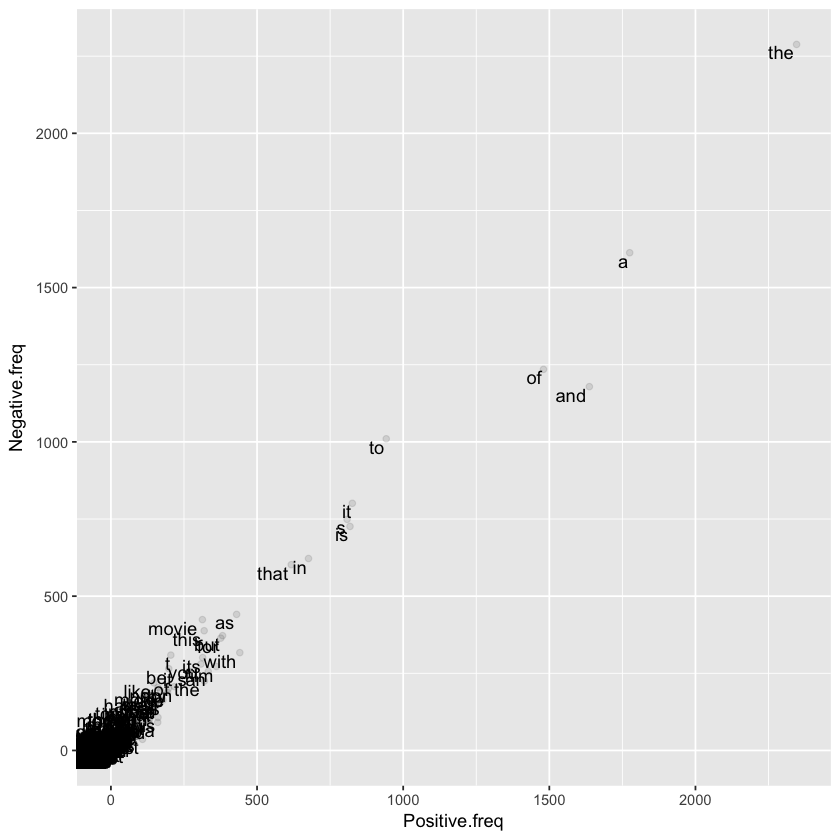

In [18]:
(term.counts %>% 
 ggplot(data=., mapping=aes(x=Positive.freq, y=Negative.freq, label=term)) 
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, vjust=1.1) 
)

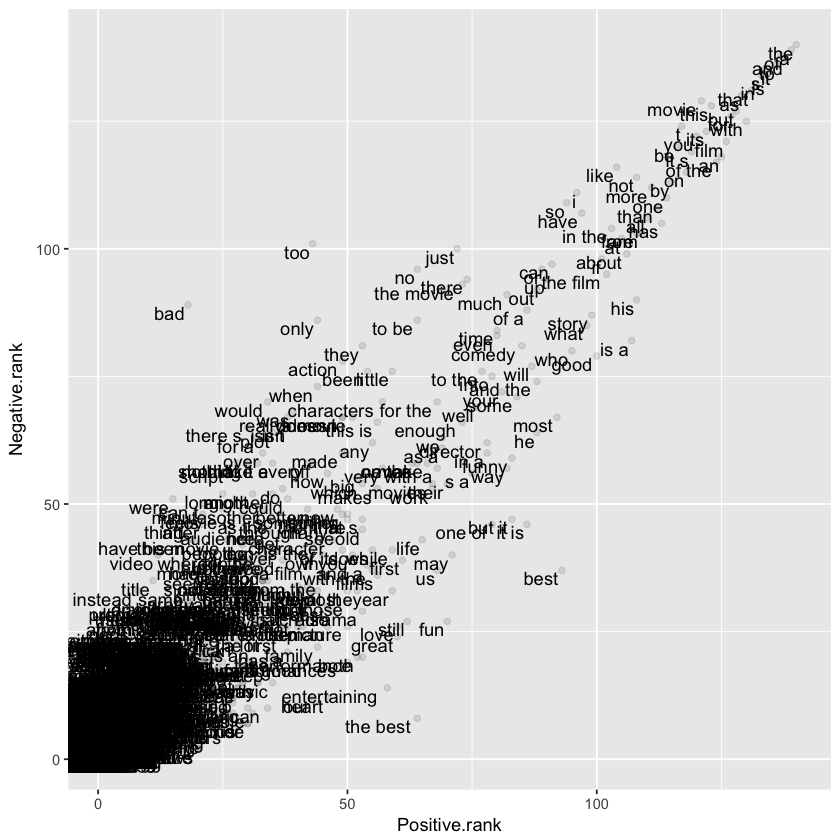

In [6]:
(term.counts %>% 
 ggplot(data=., mapping=aes(x=Positive.rank, y=Negative.rank, label=term)) 
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, vjust=1.1) 
)

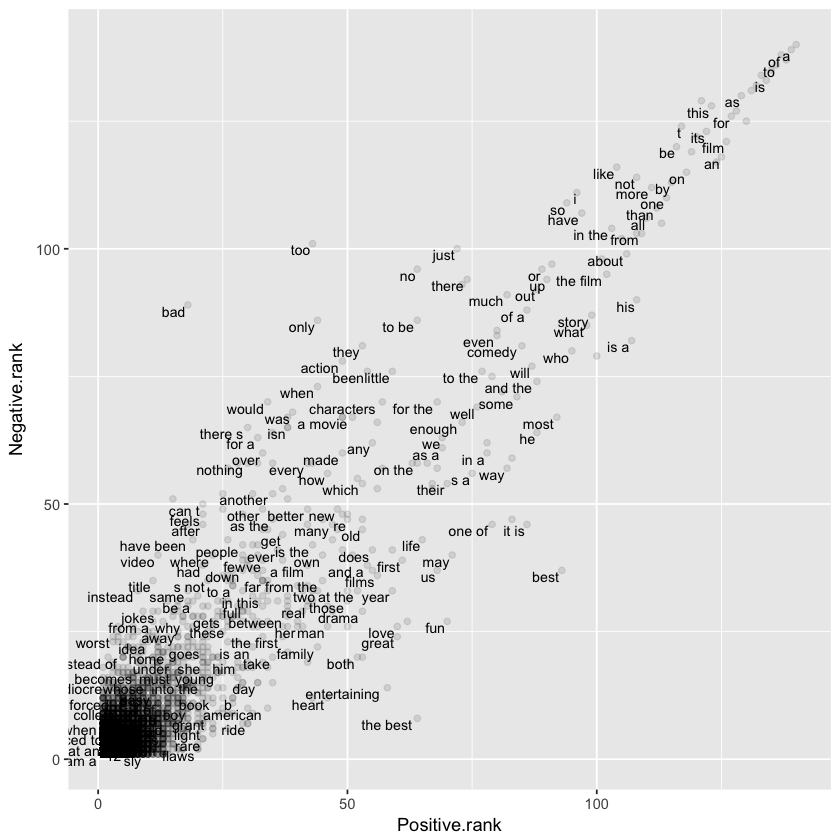

In [19]:
(term.counts %>% 
 ggplot(data=., mapping=aes(x=Positive.rank, y=Negative.rank, label=term)) 
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, vjust=1.1, check_overlap=TRUE, size=3) 
)

In [20]:
p_val = 0.01
z_cutoff <- qnorm(1 - p_val/2)
z_cutoff

[1] 2.575829

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point(alpha=.1)
)

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point(alpha=.1)
 + geom_text(hjust=1.1, 
             vjust=1.1) 
)

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point(alpha=.2)
 + geom_text(check_overlap = TRUE,
             hjust=1.1, 
             vjust=1.1) 
)

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point()
 + geom_text(data=filter(term.counts, abs(z.score)>z_cutoff), 
             check_overlap = TRUE,
             hjust=1.1,
             vjust=1.1) 
)

In [ ]:
(term.counts %>% ggplot(data=., mapping=aes(x=sum.freq, y=z.score, label=term)) 
 + scale_x_log10()
 + geom_point()
 + geom_text_repel(data=filter(term.counts, abs(z.score)>z_cutoff)) 
)

In [ ]:
(term.counts %>% ggplot(data=., 
                        mapping=aes(x=sum.freq, 
                                    y=z.score, 
                                    label=term,
                                    color=(abs(z.score) > z_cutoff)),)
 + scale_color_manual(values = c("grey", "red"))
 + scale_x_log10()
 + scale_y_continuous(limits=c(-10, 10))
 + geom_point(size=0.5, alpha=0.5)
 + geom_text_repel(data=term.counts[term.counts$z.score > z_cutoff,], 
                   #mapping=aes(size=abs(z.score)),
                   ylim = c(z_cutoff, NA), 
                   color = "grey20",
                   size=2,
                   segment.size = 0.1,
                   point.padding = .1)
 + geom_text_repel(data=term.counts[term.counts$z.score < -z_cutoff,], 
                   #mapping=aes(size=abs(z.score)),
                   ylim = c(NA, -z_cutoff), 
                   color = "grey20",
                   size=2,
                   segment.size = 0.1,
                   point.padding = .1)
 + theme_classic(base_size = 10) 
 + theme(legend.position="none")
)

In [ ]:
nice.plot <- (term.counts %>% ggplot(data=., 
                        mapping=aes(x=sum.freq, 
                                    y=z.score, 
                                    label=term,
                                    color=(abs(z.score) > z_cutoff)),)
 + scale_color_manual(values = c("grey", "red"))
 + scale_x_log10()
 + geom_point(size=0.5, alpha=0.5)
 + geom_text(data=term.counts[term.counts$z.score > z_cutoff,], 
             size=1.5,
             color = "grey20",
             check_overlap = TRUE,
             hjust=1.1, 
             vjust=1.1)
 + geom_text(data=term.counts[term.counts$z.score < -z_cutoff,], 
             size=1.5,
             color = "grey20",
             check_overlap = TRUE,
             hjust=1.1, 
             vjust=1.1)
 + theme_classic(base_size = 10) 
 + theme(legend.position="none")
)
nice.plot

In [ ]:
#chart_link <- api_create(p, filename="geom_point/scatter")
#chart_link

In [ ]:
ui <- fluidPage(
  plotlyOutput("plot"),
  verbatimTextOutput("event")
)

server <- function(input, output) {

  output$plot <- renderPlotly({
    nice.plot
  })

  output$event <- renderPrint({
    d <- event_data("plotly_hover")
    if (is.null(d)) "Hover on a point!" else d
  })
}

shinyApp(ui, server)